In [1]:
%matplotlib notebook
import xemc3
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import xarray as xr
import numpy as np
import ipywidgets as widgets
import mpl_interactions.ipyplot as iplt
from pathlib import Path

In [2]:
experiment = "N03.00_P05.00_D05_C04.50-TEST"
ds = xr.open_dataset(f"../atomdatpy/NetCDFs/{experiment}.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:                       (r: 139, theta: 512, phi: 36, delta_r: 2, delta_theta: 2, delta_phi: 2, iteration: 1000, Ionization: 7)
Coordinates:
    R_bounds                      (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    z_bounds                      (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    phi_bounds                    (phi, delta_phi) float64 ...
  * iteration                     (iteration) int64 -999 -998 -997 ... -2 -1 0
  * Ionization                    (Ionization) int64 0 1 2 3 4 5 6
Dimensions without coordinates: r, theta, phi, delta_r, delta_theta, delta_phi
Data variables: (12/69)
    _plasma_map                   (r, theta, phi) int64 ...
    ne                            (r, theta, phi) float64 ...
    nZ1                           (r, theta, phi) float64 ...
    nZ2                           (r, theta, phi) float64 ...
    nZ3                           (r, theta, phi) float64 ...
    nZ4                           (r, theta, phi) float64 ...
    ...                            ...
    ionization_moment_fwd         (iteration) float64 ...
    ionization_moment_bwk         (iteration) float64 ...
    TOTAL_FLX                     (iteration) float64 ...
    TOTAL_RAD                     (iteration) float64 ...
    Ez                            (Ionization, r, theta, phi) float64 ...
    Lz                            (r, theta, phi) float64 ...

In [2]:
dsdir = Path("../atomdatpy/NetCDFs/")

# allfullds = dsdir.glob("*[!E][!z].nc")
# only_carbon_ds = allfullds.glob("*C.nc")

only_carbon_ds = dsdir.glob("*-C.nc")
dspaths = only_carbon_ds

<IPython.core.display.Javascript object>


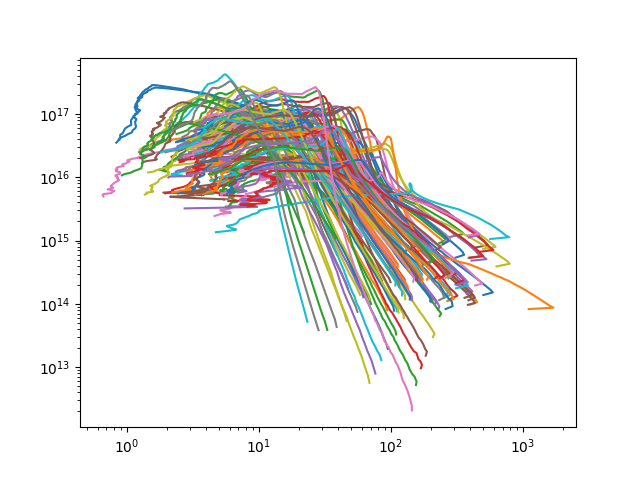

In [3]:
fig, ax = plt.subplots()

for dspath in dspaths:
    #print(dspath)
    ds = xr.open_dataset(dspath)
    nhchange = ds.nH.mean(dim=("theta", "phi"))
    techange = ds.Te.mean(dim=("theta", "phi"))

    ax.plot(techange, nhchange)

In [4]:
ax.set_yscale("log")
ax.set_xscale("log")

In [55]:
fig.show()

In [56]:
f = lambda x: 1e21 * x**(-3.0)

In [58]:
x = np.logspace(-1,4,200)
y = f(x)
ax.plot(x,y,ls="-", c="k")